# 프로젝트 계획
진행순서

데이터 선정 및 데이터 문제 및 분석

데이터 EDA , wrangling 을 통해 tidy data 만들기

시각화 및 데이터 특성 분석

분류모델을 통해 머신러닝모델 제작

평가 및 결과 인사이트

발표자료 제작 및 영상촬영


https://www.kaggle.com/datasets/fridrichmrtn/user-churn-dataset 
사용자 이탈 데이터세트

target: 한달정도 상호 작용이 없다면 사용자 이탈이라 판단

Retail Rocket(retailrocket.io)은 전 세계적으로 1억 명 이상의 고유한 월간 사용자와 1000개 이상의 소매 파트너가 있는 여러 채널을 통해 개인화된 실시간 추천을 제공하여 웹 쇼핑객이 더 나은 쇼핑 결정을 내릴 수 있도록 돕습니다.

ex) 아마존, 알리바바와 같은 e-커머스 리테일

In [1]:
!pip install category_encoders==2.*
!pip3 install imbalanced-learn
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 3.9 MB/s 


In [2]:
import pandas as pd

# 데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving ecom-user-churn-data.csv to ecom-user-churn-data.csv


In [3]:
df1 = pd.read_csv('ecom-user-churn-data.csv')

print(df1.shape,'\n' 
      , df1.columns)   
df1.head(10)

(49358, 49) 
 Index(['visitorid', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv',
       'user_rec', 'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n',
       'tran_n_r', 'rev_sum', 'rev_sum_r', 'major_spend_r', 'int_cat_n_avg',
       'int_itm_n_avg', 'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd',
       'ses_wknd_r', 'ses_len_avg', 'time_to_int', 'time_to_tran',
       'int_cat1_n', 'int_cat2_n', 'int_cat3_n', 'int_cat4_n', 'int_cat5_n',
       'int_cat6_n', 'int_cat7_n', 'int_cat8_n', 'int_cat9_n', 'int_cat10_n',
       'int_cat11_n', 'int_cat12_n', 'int_cat13_n', 'int_cat15_n',
       'int_cat16_n', 'int_cat17_n', 'int_cat18_n', 'int_cat19_n',
       'int_cat20_n', 'int_cat21_n', 'int_cat22_n', 'int_cat23_n',
       'int_cat24_n', 'target_class'],
      dtype='object')


,visitorid,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,...,int_cat16_n,int_cat17_n,int_cat18_n,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class
0,89,23.0,16.000000,0.000000,0.000000,39.0,2.0,0.051282,3.0,1.500000,...,0,0,0,0,3,0,0,0,0,1
1,251,23.0,61.000000,0.000000,0.000000,85.0,2.0,0.023529,2.0,1.000000,...,0,0,0,0,0,0,1,0,0,1
2,270,14.0,0.100000,0.300000,3.000000,21.0,11.0,0.523810,13.0,1.181818,...,0,0,0,0,0,0,13,0,0,1
3,298,11.0,13.000000,0.000000,0.000000,24.0,2.0,0.083333,4.0,2.000000,...,0,0,0,3,1,0,0,0,0,1
4,474,16.0,26.000000,0.000000,0.000000,43.0,2.0,0.046512,2.0,1.000000,...,2,0,0,0,0,0,0,0,0,1
5,656,21.0,3.000000,0.000000,0.000000,24.0,2.0,0.083333,2.0,1.000000,...,0,0,0,0,0,0,2,0,0,1
6,724,26.0,6.333334,6.944223,1.096456,47.0,4.0,0.085106,13.0,3.250000,...,0,13,0,0,0,0,0,0,0,0
7,1163,16.0,5.000000,0.000000,0.000000,22.0,2.0,0.090909,2.0,1.000000,...,0,0,0,2,0,0,0,0,0,1
8,1288,10.0,4.000000,0.000000,0.000000,14.0,2.0,0.142857,2.0,1.000000,...,0,0,0,2,0,0,0,0,0,1
9,1312,8.0,0.000000,0.000000,-1.000000,8.0,2.0,0.250000,2.0,1.000000,...,0,0,0,0,0,0,2,0,0,1


# 특성 설명
visitorid : user identifier

ses_rec: time difference from the last user session and current (split) date 
[days]   마지막 사용자 세션 및 현재(예:) 날짜와의 시간 차이

ses_rec_avg: average period between sessions [days] 세션 간의 평균 기간

ses_rec_sd: standard deviation in time between sessions [days] 세션 간의 표준 편차

ses_rec_cv: ratio of standard deviation in time to session to average time to session (coefficient of variation) [%] 세션에 대한 평균 시간 대 세션의 표준 편차 비율(변동 계수)

user_rec: difference between the start of the first user session and current (split) date [days] 첫 번째 사용자 세션 시작 날짜와 현재(예: 날짜) 날짜 간의 차이

ses_n: session count [n] 세션 카운트

ses_n_r: ratio of session frequency to account maturity [session/a day] 계정 만기 대비 세션 빈도 비율

int_n: user–application interaction (view/add-to-cart/buy clicks) count [n] 사용자-애플리케이션 상호 작용(보기/카트에 추가/구매 클릭) 횟수

int_n_r: ratio of user–app interaction frequency to session frequency [int/session] 세션 빈도에 대한 사용자-앱 상호 작용 빈도 비율

tran_n: transaction count [n] 거래 건수

tran_n_r: ratio of transactional frequency to session frequency (individual conversion rate) [transaction/session] 세션 빈도에 대한 거래 빈도의 비율(개별 전환율)

rev_sum: total revenue [USD] 총 수익

rev_sum_r: total revenue to session frequency [USD/session] 
세션 빈도에 대한 총 수익

major_spend_r: proportion of sessions with above-average spending [%] 평균 지출 이상의 세션 비율

int_cat_n_avg: average no of distinct root-level categories interacted in session [n] 세션에서 상호 작용한 고유한 루트 수준 범주의 평균 수

int_itm_n_avg: average no of distinct items interacted in session [n] 세션에서 상호작용한 개별 항목의 평균 수

ses_mo_avg: average month (session start) 
평균 월(세션 시작)

ses_mo_sd: standard deviation in months 표준 편차(개월)

ses_ho_avg: average hour of a day (session start) 하루 평균 시간(세션 시작)

ses_ho_sd: standard deviation in hours of a day 하루 중 시간의 표준 편차

ses_wknd_r: weekend sessions proportion [%] 주말 세션 비율

ses_len_avg: average session duration [min] 평균 세션 시간

time_to_int: average time between interactions within a session [mins] 세션 내 상호작용 사이의 평균 시간

time_to_tran: average time between transactional events [days] 거래 이벤트 사이의 평균 시간

int_cat(1~24)_n: sum of interactions across root-level categories [n] 루트 수준 범주 간의 상호 작용 합계

target_class: interaction/no interaction in the following month 상호 작용/다음 달에 상호 작용 없음

In [4]:
df1.dtypes

visitorid          int64
ses_rec          float64
ses_rec_avg      float64
ses_rec_sd       float64
ses_rec_cv       float64
user_rec         float64
ses_n            float64
ses_n_r          float64
int_n            float64
int_n_r          float64
tran_n           float64
tran_n_r         float64
rev_sum          float64
rev_sum_r        float64
major_spend_r    float64
int_cat_n_avg    float64
int_itm_n_avg    float64
ses_mo_avg       float64
ses_mo_sd        float64
ses_ho_avg       float64
ses_ho_sd        float64
ses_wknd_r       float64
ses_len_avg      float64
time_to_int      float64
time_to_tran     float64
int_cat1_n         int64
int_cat2_n         int64
int_cat3_n         int64
int_cat4_n         int64
int_cat5_n         int64
int_cat6_n         int64
int_cat7_n         int64
int_cat8_n         int64
int_cat9_n         int64
int_cat10_n        int64
int_cat11_n        int64
int_cat12_n        int64
int_cat13_n        int64
int_cat15_n        int64
int_cat16_n        int64


In [5]:
df1.describe()

,visitorid,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,...,int_cat16_n,int_cat17_n,int_cat18_n,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class
count,4.935800e+04,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,...,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000
mean,7.072986e+05,15.454840,11.231611,2.711961,-0.020100,33.822947,3.366445,0.172372,6.716277,1.720975,...,0.955792,0.773714,0.382977,0.732424,0.503343,0.447020,2.102577,0.038130,0.099579,0.885591
std,4.072098e+05,9.184645,18.162743,6.583917,0.917701,25.237703,7.380573,0.372614,38.528882,1.455885,...,6.086722,5.003517,4.569604,4.977989,3.259194,3.873684,16.273213,0.593681,1.135149,0.318311
min,3.700000e+01,0.000000,0.000000,0.000000,-1.000000,0.000000,2.000000,-1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.532920e+05,7.000000,0.000000,0.000000,-1.000000,16.000000,2.000000,0.060606,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7.100910e+05,16.000000,2.250000,0.000000,0.000000,26.000000,2.000000,0.090909,3.000000,1.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.060355e+06,23.000000,14.250000,1.000000,0.638646,46.000000,3.000000,0.166667,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
max,1.407573e+06,31.000000,99.000000,47.500000,11.525121,99.000000,475.000000,18.000000,5549.000000,59.000000,...,576.000000,445.000000,481.000000,564.000000,317.000000,420.000000,2282.000000,54.000000,105.000000,1.000000


In [6]:
df1.duplicated().sum() # 중복 확인

0

In [7]:
df1.isnull().sum()   # 결측치 없음

visitorid        0
ses_rec          0
ses_rec_avg      0
ses_rec_sd       0
ses_rec_cv       0
user_rec         0
ses_n            0
ses_n_r          0
int_n            0
int_n_r          0
tran_n           0
tran_n_r         0
rev_sum          0
rev_sum_r        0
major_spend_r    0
int_cat_n_avg    0
int_itm_n_avg    0
ses_mo_avg       0
ses_mo_sd        0
ses_ho_avg       0
ses_ho_sd        0
ses_wknd_r       0
ses_len_avg      0
time_to_int      0
time_to_tran     0
int_cat1_n       0
int_cat2_n       0
int_cat3_n       0
int_cat4_n       0
int_cat5_n       0
int_cat6_n       0
int_cat7_n       0
int_cat8_n       0
int_cat9_n       0
int_cat10_n      0
int_cat11_n      0
int_cat12_n      0
int_cat13_n      0
int_cat15_n      0
int_cat16_n      0
int_cat17_n      0
int_cat18_n      0
int_cat19_n      0
int_cat20_n      0
int_cat21_n      0
int_cat22_n      0
int_cat23_n      0
int_cat24_n      0
target_class     0
dtype: int64

In [8]:
df1['ses_rec'] = df1['ses_rec'].astype(int)
df1['int_n'] = df1['int_n'].astype(int)
df1['tran_n'] = df1['tran_n'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

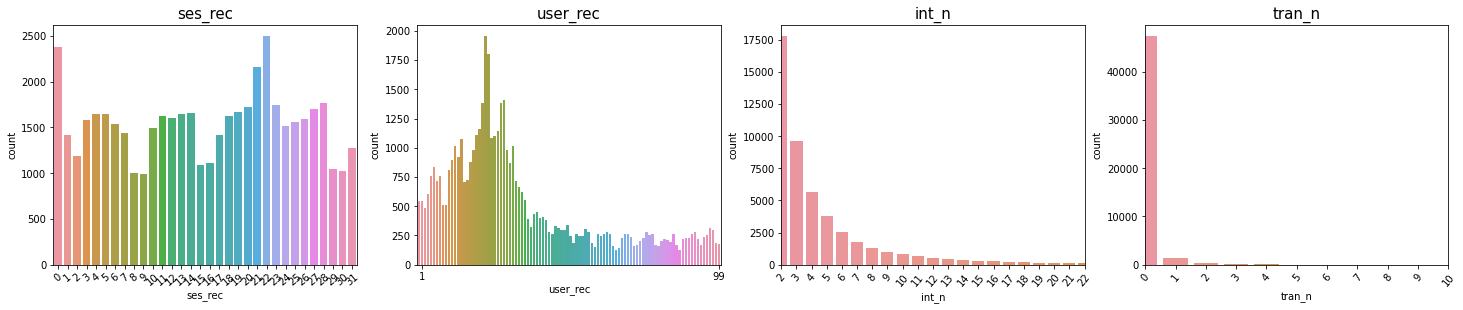

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,15))
plt.subplot(3,4,1)
sns.countplot(df1['ses_rec'])
plt.title(str("ses_rec"),fontsize=15)
plt.xticks(rotation=40)

plt.subplot(3,4,2)
sns.countplot(df1['user_rec'])
plt.title(str('user_rec'),fontsize=15)
plt.xticks([1,99],[1,99])

plt.subplot(3,4,3)
sns.countplot(df1['int_n'])
plt.title(str("int_n"),fontsize=15)
plt.xticks(rotation=50)
plt.xlim(0,20)
plt.subplot(3,4,4)
sns.countplot(df1['tran_n'])
plt.title(str("tran_n"),fontsize=15)
plt.xticks(rotation=50)
plt.xlim(0,10)

plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

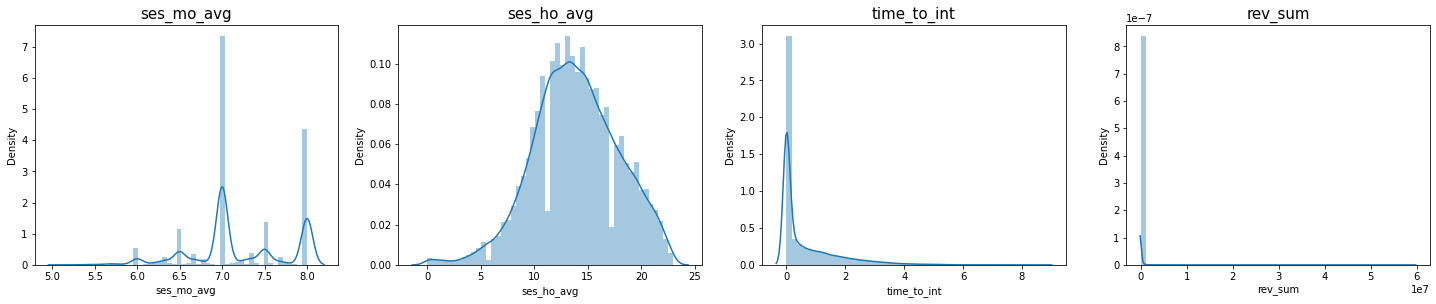

In [11]:
plt.figure(figsize=(25,15))
plt.subplot(3,4,1)
sns.distplot(df1['ses_mo_avg'])
plt.title(str("ses_mo_avg"),fontsize=15)
plt.subplot(3,4,2)
sns.distplot(df1['ses_ho_avg'])
plt.title(str("ses_ho_avg"),fontsize=15)
plt.subplot(3,4,3)
sns.distplot(df1['time_to_int'])
plt.title(str("time_to_int"),fontsize=15)
plt.subplot(3,4,4)
sns.distplot(df1['rev_sum'])
plt.title(str("rev_sum"),fontsize=15)
plt.show();

In [12]:
#EDA 시작
df = df1.copy()

# int_cat를 모두 지워버리고 한번이라도 들어간 것들을 횟수처리하거나 0,1로 변환
def use(x):
  if ((x['int_cat1_n'] == 0) & 
      (x['int_cat2_n'] == 0) &
      (x['int_cat3_n'] == 0) & 
      (x['int_cat4_n'] == 0) & 
      (x['int_cat5_n'] == 0) & 
      (x['int_cat6_n'] == 0) & 
      (x['int_cat7_n'] == 0) & 
      (x['int_cat8_n'] == 0) & 
      (x['int_cat9_n'] == 0) & 
      (x['int_cat10_n'] == 0) & 
      (x['int_cat11_n'] == 0) & 
      (x['int_cat12_n'] == 0) & 
      (x['int_cat13_n'] == 0) & 
      (x['int_cat15_n'] == 0) & 
      (x['int_cat16_n'] == 0) & 
      (x['int_cat17_n'] == 0) & 
      (x['int_cat18_n'] == 0) & 
      (x['int_cat19_n'] == 0) & 
      (x['int_cat20_n'] == 0) & 
      (x['int_cat21_n'] == 0) & 
      (x['int_cat22_n'] == 0) &
      (x['int_cat23_n'] == 0) & 
      (x['int_cat24_n'] == 0)):
     return 0
  else:
     return 1


df['int_cat_use']  =  df.apply(use, axis = 1)

# 개인 유저 아이디는 제거 

df = df.drop(columns = ['visitorid'])

df['time_to_tran'].astype(object)  # -1, 0 으로 되어있어 int에 부적합이라 판단
df['target_class'].astype('category')

0        1
1        1
2        1
3        1
4        1
        ..
49353    1
49354    1
49355    1
49356    1
49357    1
Name: target_class, Length: 49358, dtype: category
Categories (2, int64): [0, 1]

In [13]:
def changer(x):
  if x < 10:
    return 1
  if (x < 20) & (x > 9) : 
    return 2
  else:
    return 3

def nchanger(x):
  if x == 0 :
    return 0
  else:
    return 1

df['tran_n_0'] = df['tran_n'].apply(nchanger) 
df['tran_n_category'] = df['tran_n'].apply(changer)

df

,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,tran_n,...,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class,int_cat_use,tran_n_0,tran_n_category
0,23,16.000000,0.000000,0.000000,39.0,2.0,0.051282,3,1.500000,0,...,0,3,0,0,0,0,1,1,0,1
1,23,61.000000,0.000000,0.000000,85.0,2.0,0.023529,2,1.000000,0,...,0,0,0,1,0,0,1,1,0,1
2,14,0.100000,0.300000,3.000000,21.0,11.0,0.523810,13,1.181818,0,...,0,0,0,13,0,0,1,1,0,1
3,11,13.000000,0.000000,0.000000,24.0,2.0,0.083333,4,2.000000,0,...,3,1,0,0,0,0,1,1,0,1
4,16,26.000000,0.000000,0.000000,43.0,2.0,0.046512,2,1.000000,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49353,14,73.000000,0.000000,0.000000,87.0,2.0,0.022989,2,1.000000,0,...,2,0,0,0,0,0,1,1,0,1
49354,19,13.000000,0.000000,0.000000,32.0,2.0,0.062500,4,2.000000,0,...,0,0,0,0,2,0,1,1,0,1
49355,21,0.666667,0.942809,1.414214,23.0,4.0,0.173913,14,3.500000,0,...,14,0,0,0,0,0,1,1,0,1
49356,1,0.000000,0.000000,-1.000000,2.0,2.0,1.000000,2,1.000000,0,...,0,0,0,0,0,0,1,1,0,1


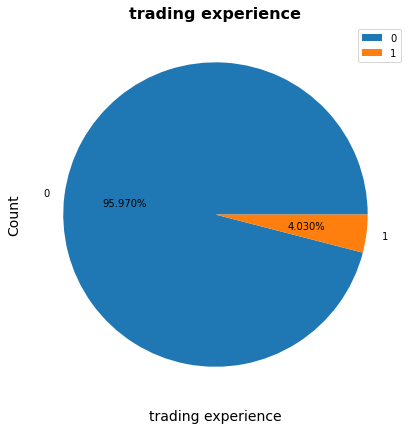

In [14]:
plt.figure(figsize = [12,7])
df['tran_n_0'].value_counts(normalize=True).plot.pie(autopct="%.3f%%")
plt.title('trading experience', fontsize=16, fontweight='bold')
plt.xlabel('trading experience', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=16)

plt.legend()
plt.show();

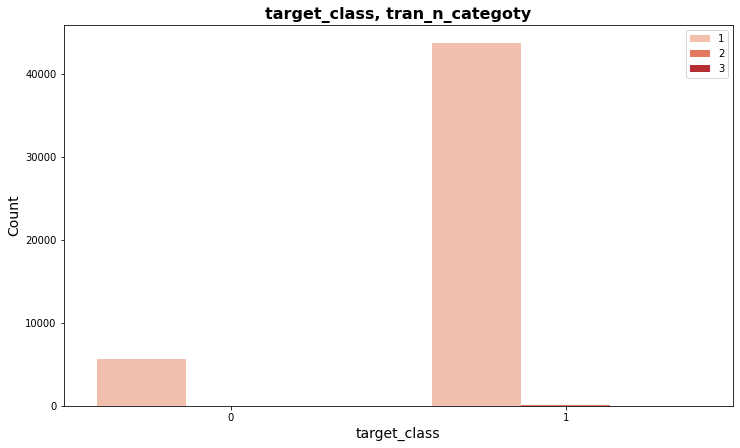

In [15]:
plt.figure(figsize = [12,7])
sns.countplot(data=df, x='target_class', hue='tran_n_category', palette='Reds')
plt.title('target_class, tran_n_categoty', fontsize=16, fontweight='bold')
plt.xlabel('target_class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=16)

plt.legend()
plt.show();

In [16]:
df['int_cat_use'].value_counts()

1    49358
Name: int_cat_use, dtype: int64

모두 다 상호작용 했으므로 그냥 의미있는 값이라고 생각안하므로 다 삭제

In [17]:
df = df.drop(columns = ['int_cat_use'])

In [18]:
# 모두 0인 특성 제거
df=df.drop(['int_cat15_n'], axis = 1)
df.columns

Index(['ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv', 'user_rec',
       'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n', 'tran_n_r', 'rev_sum',
       'rev_sum_r', 'major_spend_r', 'int_cat_n_avg', 'int_itm_n_avg',
       'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r',
       'ses_len_avg', 'time_to_int', 'time_to_tran', 'int_cat1_n',
       'int_cat2_n', 'int_cat3_n', 'int_cat4_n', 'int_cat5_n', 'int_cat6_n',
       'int_cat7_n', 'int_cat8_n', 'int_cat9_n', 'int_cat10_n', 'int_cat11_n',
       'int_cat12_n', 'int_cat13_n', 'int_cat16_n', 'int_cat17_n',
       'int_cat18_n', 'int_cat19_n', 'int_cat20_n', 'int_cat21_n',
       'int_cat22_n', 'int_cat23_n', 'int_cat24_n', 'target_class', 'tran_n_0',
       'tran_n_category'],
      dtype='object')

In [19]:
df['target_class'].value_counts()

#0.885590988289639

1    43711
0     5647
Name: target_class, dtype: int64

Baseline Accuracy: 0.885590988289639


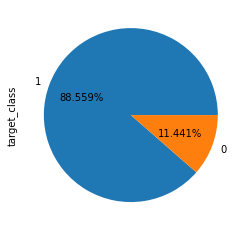

In [20]:
target = "target_class"
df[target].value_counts(normalize=True).plot.pie(autopct="%.3f%%")
print("Baseline Accuracy:", df[target].value_counts(normalize=True).max())
#기준모델 0.885636으로 잡는다.

타겟의 비율이 불균형하여 비율을 맞춰주겠다.



--------------------------------------------------------------------------------------------------------------

In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, stratify=df[target], random_state=42)
train, val = train_test_split(train, test_size=0.2, stratify=train[target], random_state=42)
print(train.shape, val.shape , test.shape)

(31588, 49) (7898, 49) (9872, 49)


In [22]:
print("Train target distribution:\n", train[target].value_counts(normalize=True), "\n")
print("Val target distribution:\n", val[target].value_counts(normalize=True), "\n")
print("Test target distribution:\n", test[target].value_counts(normalize=True))

Train target distribution:
 1    0.885589
0    0.114411
Name: target_class, dtype: float64 

Val target distribution:
 1    0.885541
0    0.114459
Name: target_class, dtype: float64 

Test target distribution:
 1    0.885636
0    0.114364
Name: target_class, dtype: float64


In [23]:
X_train, y_train = train.drop(columns=[target]), train[target]
X_val, y_val = val.drop(columns=[target]), val[target]
X_test, y_test = test.drop(columns=[target]), test[target]

In [24]:
from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
# 
from xgboost import XGBClassifier

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
)
print(model)

XGBClassifier(eval_metric='auc', max_depth=5, n_estimators=987654321, n_jobs=-1,
              random_state=42)


In [26]:
watchlist = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

model.fit(
    X_train_encoded,
    y_train,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-auc:0.74672	validation_1-auc:0.738014
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.751865	validation_1-auc:0.745599
[2]	validation_0-auc:0.756095	validation_1-auc:0.748338
[3]	validation_0-auc:0.757105	validation_1-auc:0.750108
[4]	validation_0-auc:0.758011	validation_1-auc:0.751133
[5]	validation_0-auc:0.758748	validation_1-auc:0.752213
[6]	validation_0-auc:0.759158	validation_1-auc:0.75227
[7]	validation_0-auc:0.759727	validation_1-auc:0.751794
[8]	validation_0-auc:0.761032	validation_1-auc:0.751404
[9]	validation_0-auc:0.762221	validation_1-auc:0.751962
[10]	validation_0-auc:0.763451	validation_1-auc:0.751835
[11]	validation_0-auc:0.76432	validation_1-auc:0.752908
[12]	validation_0-auc:0.764989	validation_1-auc:0.752596
[13]	validation_0-auc:0.766019	validation_1-auc:0.752901
[14]	validation_0-auc:0.767408	validation_1-auc:0.751805
[

XGBClassifier(eval_metric='auc', max_depth=5, n_estimators=987654321, n_jobs=-1,
              random_state=42)

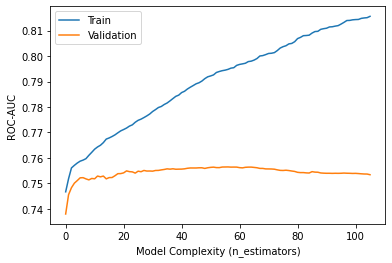

In [27]:
import matplotlib.pyplot as plt

results = model.evals_result()
train_error = results["validation_0"]["auc"]
val_error = results["validation_1"]["auc"]

plt.plot(train_error, label="Train")
plt.plot(val_error, label="Validation")
plt.ylabel("ROC-AUC")
plt.xlabel("Model Complexity (n_estimators)")
plt.legend()

In [28]:
from sklearn.metrics import classification_report

print("검증 정확도", model.score(X_val_encoded, y_val))

print(
    classification_report(
        y_val, model.predict(X_val_encoded)
    )
)

#1-class의 Recall이 굉장히 높다. 이 모델은 대부분의 입력을 1으로 예측하는 모델이라는 뜻

검증 정확도 0.8899721448467967
              precision    recall  f1-score   support

           0       0.64      0.09      0.15       904
           1       0.89      0.99      0.94      6994

    accuracy                           0.89      7898
   macro avg       0.77      0.54      0.55      7898
weighted avg       0.87      0.89      0.85      7898



In [29]:
model.predict(X_val_encoded).sum()
#1이라고 예측하는 횟수

7775

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score


def get_roc_auc(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred_proba = model.predict_proba(
            X_val_encoded
        )[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

    print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba))

    baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

    plt.plot(
        baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline"
    )
    plt.plot(fpr, tpr, color="blue", label="Model")
    plt.scatter(fpr, tpr, color="red")
    plt.legend()
    plt.title("ROC curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

ROC-AUC: 0.7564803491488279


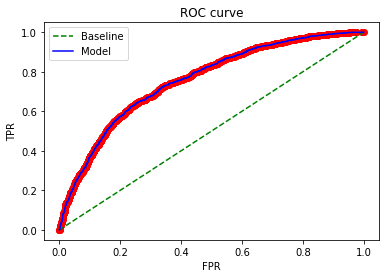

In [31]:
get_roc_auc(model, X_val_encoded, y_val)

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_confusion_matrix(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded)
    else:
        y_pred = model.predict(X_val_encoded)
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

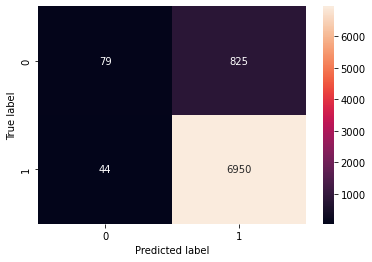

In [33]:
plot_confusion_matrix(model, X_val_encoded, y_val)

In [34]:
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(),
)

watchlist = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

model.fit(
    X_train_encoded,
    y_train,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-auc:0.751417	validation_1-auc:0.74509
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.753445	validation_1-auc:0.747124
[2]	validation_0-auc:0.759077	validation_1-auc:0.749671
[3]	validation_0-auc:0.76143	validation_1-auc:0.750903
[4]	validation_0-auc:0.763091	validation_1-auc:0.751023
[5]	validation_0-auc:0.763686	validation_1-auc:0.751272
[6]	validation_0-auc:0.764713	validation_1-auc:0.751505
[7]	validation_0-auc:0.765568	validation_1-auc:0.751617
[8]	validation_0-auc:0.76653	validation_1-auc:0.751865
[9]	validation_0-auc:0.767662	validation_1-auc:0.751572
[10]	validation_0-auc:0.768574	validation_1-auc:0.751451
[11]	validation_0-auc:0.769638	validation_1-auc:0.751945
[12]	validation_0-auc:0.77037	validation_1-auc:0.751886
[13]	validation_0-auc:0.771234	validation_1-auc:0.752371
[14]	validation_0-auc:0.771963	validation_1-auc:0.752834
[1

XGBClassifier(eval_metric='auc', max_depth=5, n_estimators=987654321, n_jobs=-1,
              random_state=42, scale_pos_weight=0.12925364598227052)

In [35]:
def summarize_results(model, X_val_encoded, y_val):
    # 1. Train / Val Loss Plot
    if isinstance(model, XGBClassifier):
        results = model.evals_result()
        tgts = results["validation_0"].keys()

        for tgt in tgts:
            train_error = results["validation_0"][tgt]
            val_error = results["validation_1"][tgt]

            plt.plot(train_error, label="Train")
            plt.plot(val_error, label="Validation")
            plt.ylabel(tgt)
            plt.xlabel("Model Complexity (n_estimators)")
            plt.legend()
            plt.show()

    # 2. Accuracy / Classification Report
    print("검증 정확도", model.score(X_val_encoded, y_val))

    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded)
    else:
        y_pred = model.predict(X_val_encoded)

    print(classification_report(y_val, y_pred))

    # 3. ROC-AUC
    get_roc_auc(model, X_val_encoded, y_val)

    # 4. Confusion Matrix
    plot_confusion_matrix(model, X_val_encoded, y_val)

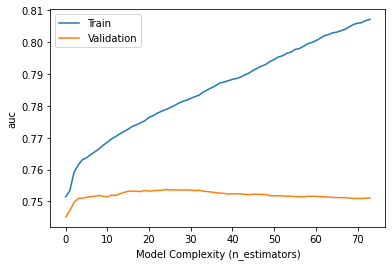

검증 정확도 0.7010635603950367
              precision    recall  f1-score   support

           0       0.22      0.66      0.33       904
           1       0.94      0.71      0.81      6994

    accuracy                           0.70      7898
   macro avg       0.58      0.68      0.57      7898
weighted avg       0.86      0.70      0.75      7898

ROC-AUC: 0.7537568548009546


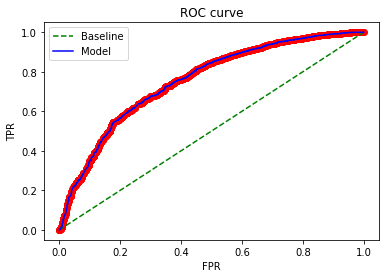

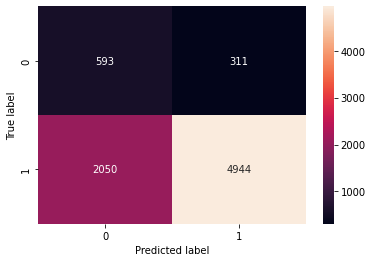

In [36]:
summarize_results(model, X_val_encoded, y_val)

In [37]:
from imblearn.under_sampling import RandomUnderSampler

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
)

X_train_sampled, y_train_sampled = RandomUnderSampler(random_state=42).fit_resample(
    X_train_encoded, y_train
)

In [38]:
# Undersampling 시 각 class의 샘플들이 동일한 비율로 샘플링된 것을 볼 수 있습니다.
y_train_sampled.value_counts()

0    3614
1    3614
Name: target_class, dtype: int64

In [39]:
watchlist = [(X_train_sampled, y_train_sampled), (X_val_encoded, y_val)]

model.fit(
    X_train_sampled,
    y_train_sampled,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-auc:0.756878	validation_1-auc:0.732865
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.762014	validation_1-auc:0.742467
[2]	validation_0-auc:0.765149	validation_1-auc:0.744927
[3]	validation_0-auc:0.767862	validation_1-auc:0.746194
[4]	validation_0-auc:0.771456	validation_1-auc:0.746278
[5]	validation_0-auc:0.772812	validation_1-auc:0.745994
[6]	validation_0-auc:0.774269	validation_1-auc:0.747157
[7]	validation_0-auc:0.775967	validation_1-auc:0.747165
[8]	validation_0-auc:0.776894	validation_1-auc:0.747798
[9]	validation_0-auc:0.77816	validation_1-auc:0.746506
[10]	validation_0-auc:0.779803	validation_1-auc:0.747147
[11]	validation_0-auc:0.781923	validation_1-auc:0.747394
[12]	validation_0-auc:0.782919	validation_1-auc:0.748
[13]	validation_0-auc:0.784638	validation_1-auc:0.747526
[14]	validation_0-auc:0.786191	validation_1-auc:0.747377
[1

XGBClassifier(eval_metric='auc', max_depth=5, n_estimators=987654321, n_jobs=-1,
              random_state=42)

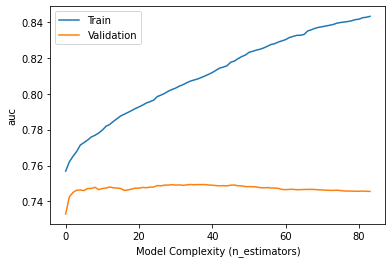

검증 정확도 0.7065079767029627
              precision    recall  f1-score   support

           0       0.23      0.66      0.34       904
           1       0.94      0.71      0.81      6994

    accuracy                           0.71      7898
   macro avg       0.58      0.68      0.57      7898
weighted avg       0.86      0.71      0.76      7898

ROC-AUC: 0.7493749383162812


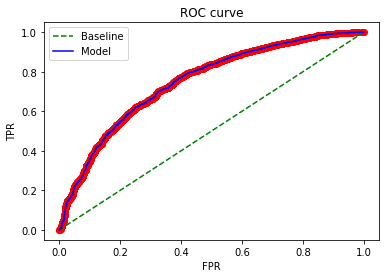

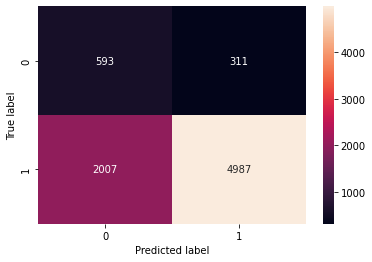

In [40]:
summarize_results(model, X_val_encoded, y_val)

In [41]:
from imblearn.over_sampling import SMOTE


model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
)

X_train_sampled, y_train_sampled = SMOTE(random_state=42).fit_resample(
    X_train_encoded, y_train
)

In [42]:
# 0-class의 데이터가 1-class의 데이터 수만큼 늘어난 것을 볼 수 있습니다.
y_train_sampled.value_counts()

1    27974
0    27974
Name: target_class, dtype: int64

In [43]:
watchlist = [(X_train_sampled, y_train_sampled), (X_val_encoded, y_val)]

model.fit(
    X_train_sampled,
    y_train_sampled,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-auc:0.811546	validation_1-auc:0.72122
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.816756	validation_1-auc:0.710369
[2]	validation_0-auc:0.827433	validation_1-auc:0.724401
[3]	validation_0-auc:0.836988	validation_1-auc:0.730734
[4]	validation_0-auc:0.85283	validation_1-auc:0.731768
[5]	validation_0-auc:0.858018	validation_1-auc:0.735104
[6]	validation_0-auc:0.861743	validation_1-auc:0.735858
[7]	validation_0-auc:0.865856	validation_1-auc:0.736779
[8]	validation_0-auc:0.871679	validation_1-auc:0.738591
[9]	validation_0-auc:0.876124	validation_1-auc:0.738657
[10]	validation_0-auc:0.879636	validation_1-auc:0.739791
[11]	validation_0-auc:0.884739	validation_1-auc:0.740481
[12]	validation_0-auc:0.892692	validation_1-auc:0.740531
[13]	validation_0-auc:0.895636	validation_1-auc:0.741162
[14]	validation_0-auc:0.90306	validation_1-auc:0.739919
[

XGBClassifier(eval_metric='auc', max_depth=5, n_estimators=987654321, n_jobs=-1,
              random_state=42)

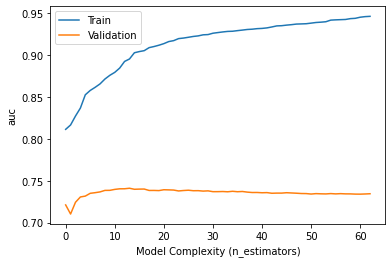

검증 정확도 0.8065332995695113
              precision    recall  f1-score   support

           0       0.28      0.45      0.35       904
           1       0.92      0.85      0.89      6994

    accuracy                           0.81      7898
   macro avg       0.60      0.65      0.62      7898
weighted avg       0.85      0.81      0.82      7898

ROC-AUC: 0.7411616720779631


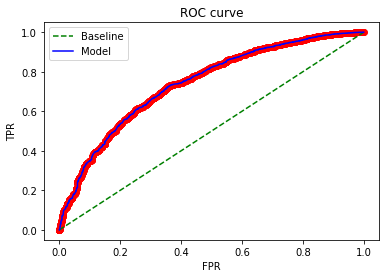

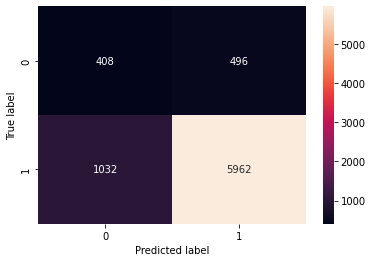

In [44]:
summarize_results(model, X_val_encoded, y_val)

In [45]:
from imblearn.combine import SMOTEENN

X_train_sampled, y_train_sampled = SMOTEENN(random_state=42).fit_resample(
    X_train_encoded, y_train
)

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=(y_train_sampled == 1).sum() / (y_train_sampled == 0).sum(),
)

In [46]:
# 0-class 데이터가 1-class 데이터만큼 생성되었다가 노이즈가 정리되었으므로, 결과적으로 각 타겟 데이터가 동일한 비율은 아니지만 0-class 데이터가 일부 새로 생성되었습니다.
y_train_sampled.value_counts()



0    26003
1    16777
Name: target_class, dtype: int64

In [47]:
watchlist = [(X_train_sampled, y_train_sampled), (X_val_encoded, y_val)]

model.fit(
    X_train_sampled,
    y_train_sampled,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-auc:0.87154	validation_1-auc:0.732343
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.878428	validation_1-auc:0.737702
[2]	validation_0-auc:0.883092	validation_1-auc:0.737068
[3]	validation_0-auc:0.885927	validation_1-auc:0.737787
[4]	validation_0-auc:0.889034	validation_1-auc:0.738315
[5]	validation_0-auc:0.891558	validation_1-auc:0.738653
[6]	validation_0-auc:0.894279	validation_1-auc:0.739815
[7]	validation_0-auc:0.895362	validation_1-auc:0.741009
[8]	validation_0-auc:0.899139	validation_1-auc:0.741391
[9]	validation_0-auc:0.901244	validation_1-auc:0.742316
[10]	validation_0-auc:0.905561	validation_1-auc:0.741563
[11]	validation_0-auc:0.90777	validation_1-auc:0.742187
[12]	validation_0-auc:0.909426	validation_1-auc:0.741748
[13]	validation_0-auc:0.911852	validation_1-auc:0.742474
[14]	validation_0-auc:0.913694	validation_1-auc:0.742946


XGBClassifier(eval_metric='auc', max_depth=5, n_estimators=987654321, n_jobs=-1,
              random_state=42, scale_pos_weight=0.6451947852170903)

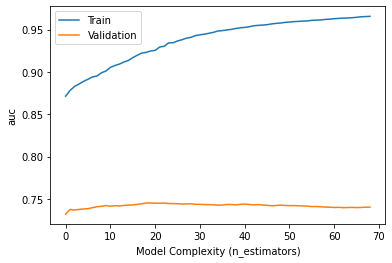

검증 정확도 0.61344644213725
              precision    recall  f1-score   support

           0       0.19      0.76      0.31       904
           1       0.95      0.60      0.73      6994

    accuracy                           0.61      7898
   macro avg       0.57      0.68      0.52      7898
weighted avg       0.86      0.61      0.68      7898

ROC-AUC: 0.7453938078403486


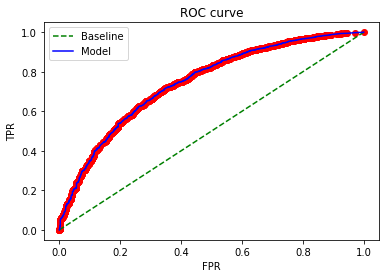

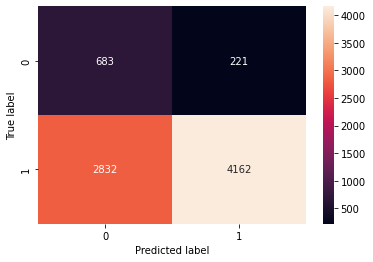

In [48]:
summarize_results(model, X_val_encoded, y_val)

In [49]:
#oversampling 사용하기로 결정 제일 결과값이 좋고 시간이 덜 걸린다.
X_train_sampled, y_train_sampled = SMOTE(random_state=42).fit_resample(
    X_train_encoded, y_train)

In [50]:
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

pipe = make_pipeline(
    # TargetEncoder: 범주형 변수 인코더로, 타겟값을 특성의 범주별로 평균내어 그 값으로 인코딩
    TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(max_depth = 10, n_jobs=-1, random_state=2)
)

k = 3

scores = cross_val_score(pipe, X_train_sampled, y_train_sampled, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

print(-scores.mean(),'\n',scores.std())

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


MAE for 3 folds: [0.35576387 0.26065394 0.35296603]
0.3231279462802461 
 0.04419055510102865


In [51]:
%%time
#Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier = xgboost.XGBClassifier()

params = {'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

#너무 길어져서 적당한 양의 하이퍼파라미터만 사용
#model fitting
rs_model.fit(X_train_sampled, y_train_sampled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 24.5 s, sys: 337 ms, total: 24.8 s
Wall time: 4min 32s


In [52]:
print("Optimal Hyperparameter:", rs_model.best_params_)
print("AUC:", rs_model.best_score_)
classifier = rs_model.best_estimator_

Optimal Hyperparameter: {'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}
AUC: 0.9695069005726854


In [53]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_val_encoded,y_val,cv=10)
score

array([0.89240506, 0.87721519, 0.89113924, 0.87341772, 0.88481013,
       0.86582278, 0.89113924, 0.88734177, 0.88212928, 0.89226869])

[0.88455696 0.88607595 0.87892604 0.88297872 0.88601824]
              precision    recall  f1-score   support

           0       0.45      0.21      0.28      1129
           1       0.90      0.97      0.93      8743

    accuracy                           0.88      9872
   macro avg       0.68      0.59      0.61      9872
weighted avg       0.85      0.88      0.86      9872



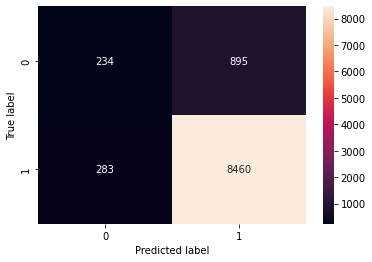

In [55]:
print(cross_val_score(classifier,X_test_encoded,y_test))
y_test_pred = classifier.predict(X_test_encoded)
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(classifier, X_test_encoded, y_test)

기준모델보다 못하는 것을 보면 기준모델이 타겟 불균형으로 인해 너무 높은 것도 원인이라 생각하며 대부분의 예측을 1로 하는 것으로 인해 0을 예측못했다.

In [56]:
import shap
row = X_test.iloc[[1]]

explainer = shap.TreeExplainer(classifier)
row_processed = encoder.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

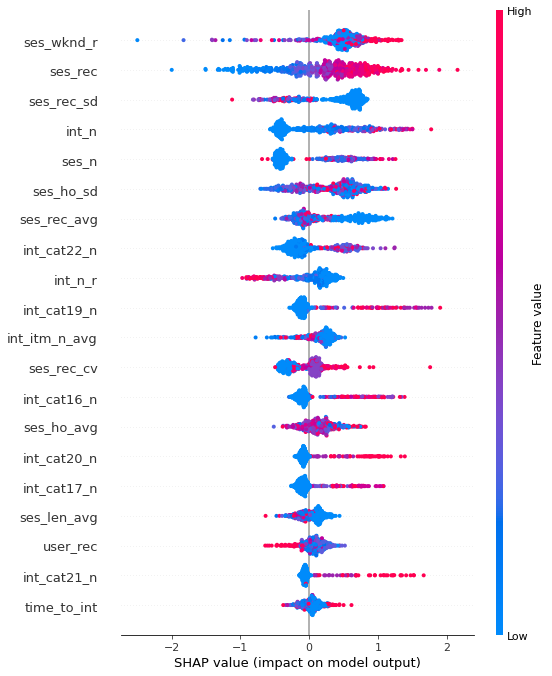

In [63]:
shap_values = explainer.shap_values(X_test.iloc[:500])
shap.summary_plot(shap_values, X_test.iloc[:500])

# 결과 및 인사이트

Ses_wknd_r 주말에 세션 접속

주말에도 상호작용을 안한다면 사용하들은 흥미를 잃게 된것이며 이것은 사용자 이탈이라고 생각할 수 있다.

int_n 상호작용 횟수

상호작용 횟수가 많다는 것은 흥미가 있다는 뜻이며 사용자들의 이탈여부를 확인하는 중요한 요소가 된다.

tran_n , rev_sum 거래건수나 수익은 내가 생각할때는 타겟에
매우 큰 영향을 줄것 같았지만 영향이 적었다는 것에 매우 큰 놀라움을 나타냈다.

user_rec , ses_rec 와 같은 사용자 세션 접속 간격을 보여주는 특성을 다음 달 사용자 이탈 예측에 큰 영향을 준다.

# 결론

기존모델과 비슷한 성능을 내는 머신러닝 모델을 제작하게 되었다.
부족한 도메인 지식으로 인해 데이터 랭글링을 충분히 진행하지 못했기 때문이다.

하지만 사용자의 접속, 기간, 상효작용등으로 사용자 이탈을 예측하는 머신러닝 모델은 충분히 제작할 수 있으며
이런 예측을 하게 된다면 회사에서도 이탈자를 미리 방지 할수 있을 것이다.